In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# load the training dataset
bike_data = pd.read_csv("F:/Datasets/london_merged.csv")
bike_data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
# as the datatype of timestamp is object we need to convert it into datetime
bike_data["timestamp"] = pd.to_datetime(bike_data["timestamp"])
# deriving month feature
bike_data["month"] = bike_data["timestamp"].apply(lambda x:x.month)
# deriving day feature
bike_data["day"] = bike_data["timestamp"].apply(lambda x:x.day)
# deriving hour feature
bike_data["hour"] = bike_data["timestamp"].apply(lambda x:x.hour)
# removing timestamp feature as there is no use now
bike_data = bike_data.drop("timestamp", axis=1) 
# checking dataframe
bike_data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,4,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,4,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4,4


In [5]:
# One-hot encoding
## 1. encoding weather_code
dummies_w = pd.get_dummies(bike_data["weather_code"], prefix="weather")
bike_data = pd.concat([bike_data,dummies_w], axis=1)
bike_data = bike_data.drop("weather_code", axis=1)

## 2. encoding season
dummies_s = pd.get_dummies(bike_data["season"], prefix="season")
bike_data = pd.concat([bike_data,dummies_s], axis=1)
bike_data = bike_data.drop("season", axis=1)

In [6]:
numeric_features = ['t1', 't2', 'hum', 'wind_speed','day','hour','month']
bike_data[numeric_features + ['cnt']].describe()

,t1,t2,hum,wind_speed,day,hour,month,cnt
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,12.468091,11.520836,72.324954,15.913063,15.751981,11.513265,6.514643,1143.101642
std,5.571818,6.615145,14.313186,7.894570,8.793704,6.915893,3.452509,1085.108068
min,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,8.000000,6.000000,63.000000,10.000000,8.000000,6.000000,4.000000,257.000000
50%,12.500000,12.500000,74.500000,15.000000,16.000000,12.000000,7.000000,844.000000
75%,16.000000,16.000000,83.000000,20.500000,23.000000,18.000000,10.000000,1671.750000
max,34.000000,34.000000,100.000000,56.500000,31.000000,23.000000,12.000000,7860.000000


C:\Users\Kalyan\AppData\Local\Temp\ipykernel_24424\3616022426.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


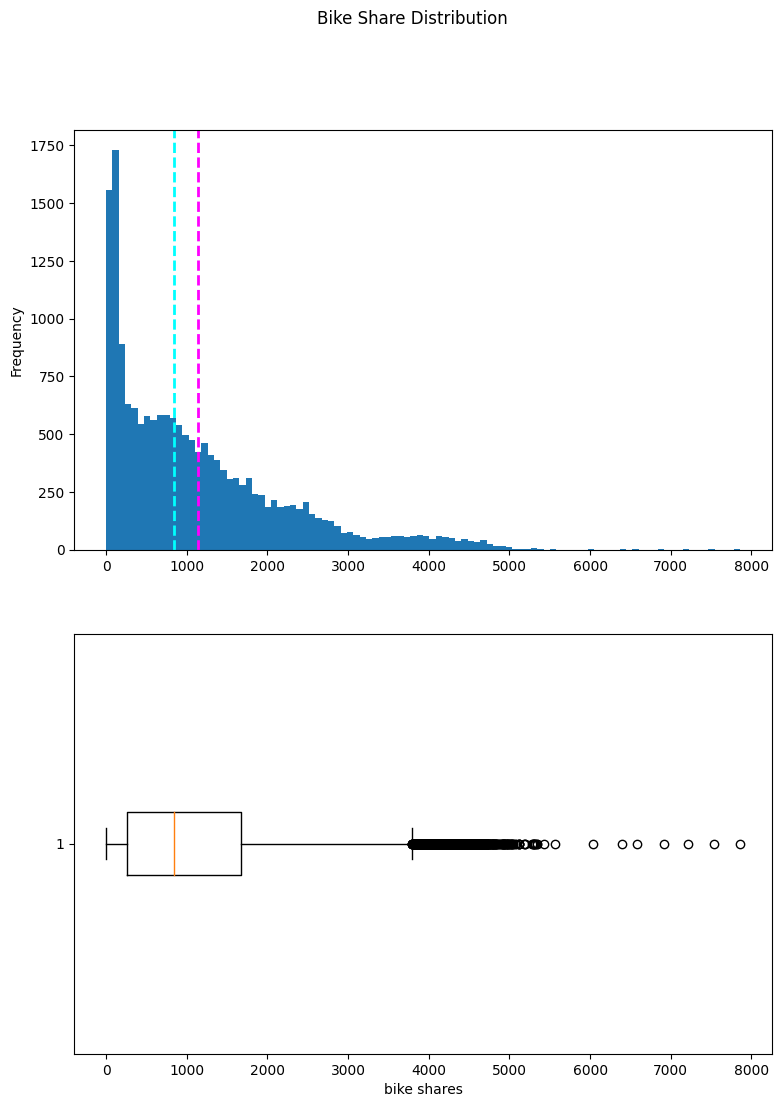

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['cnt']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('bike shares')

# Add a title to the Figure
fig.suptitle('Bike Share Distribution')

# Show the figure
fig.show()

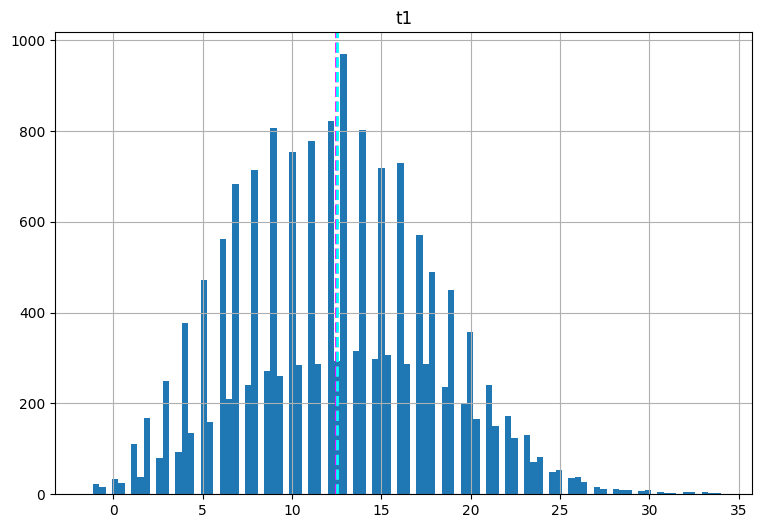

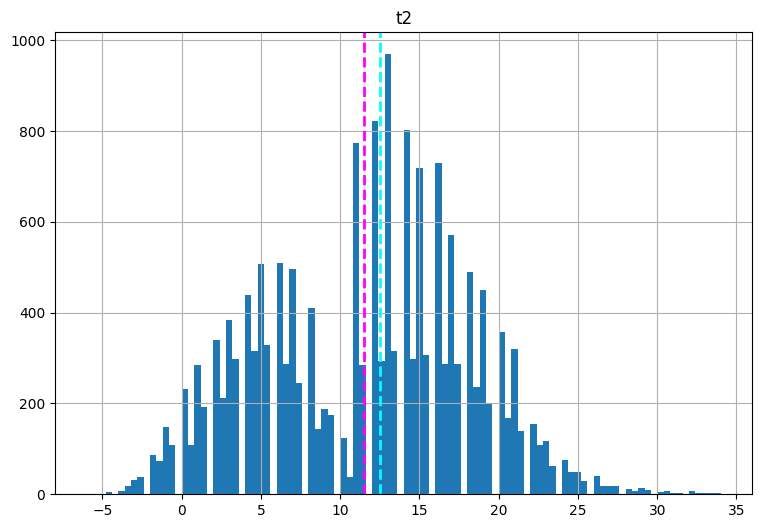

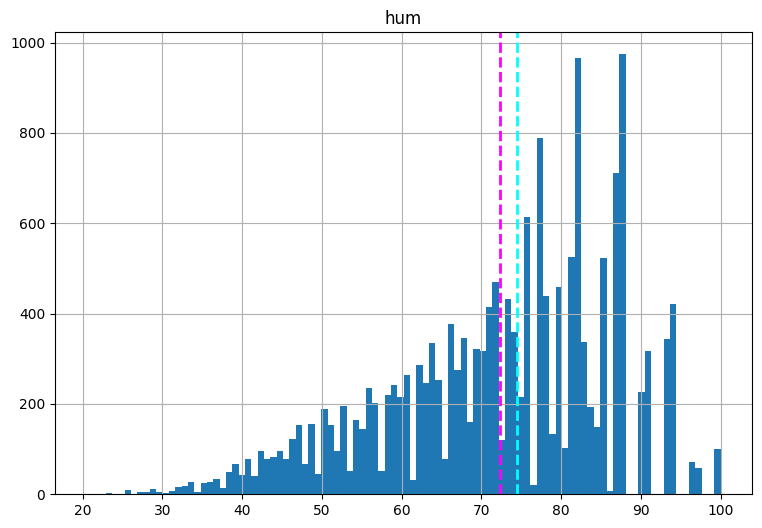

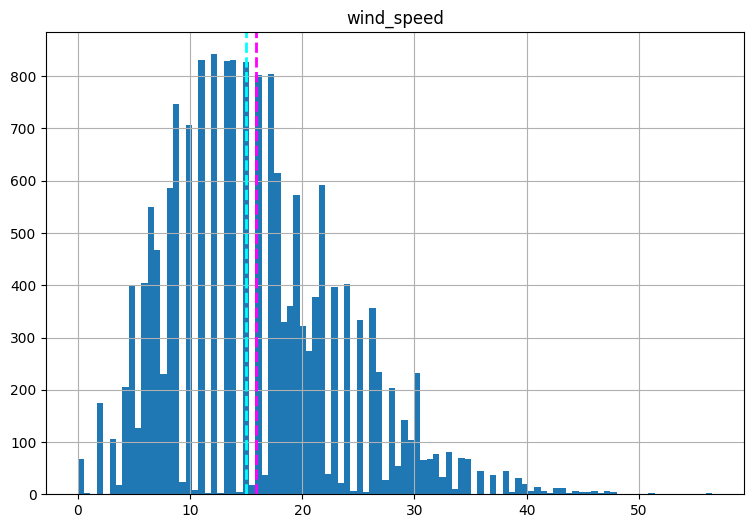

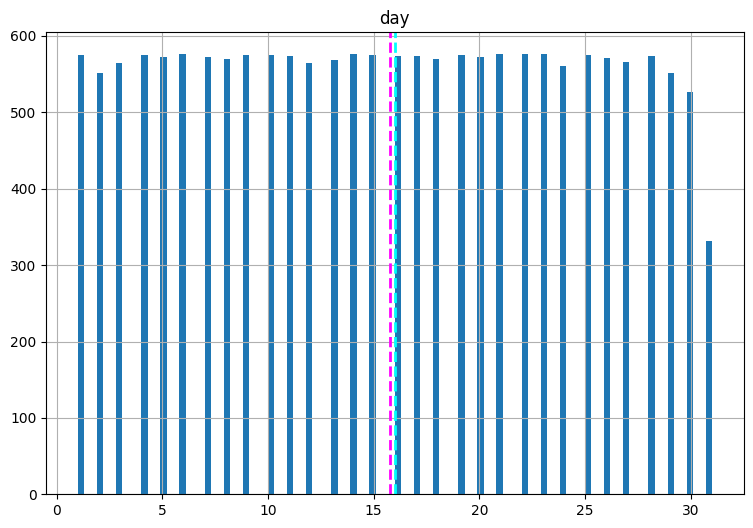

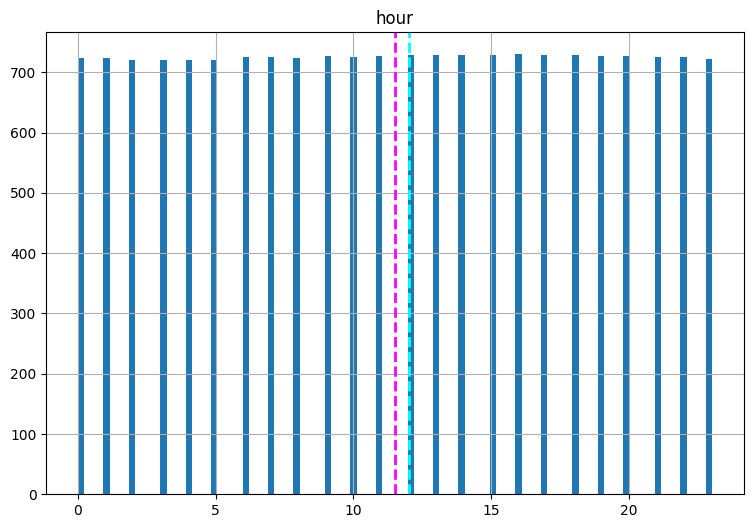

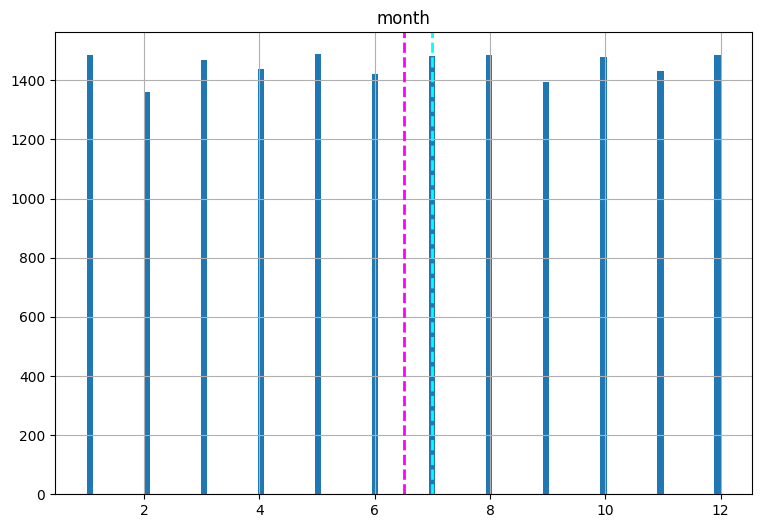

In [8]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

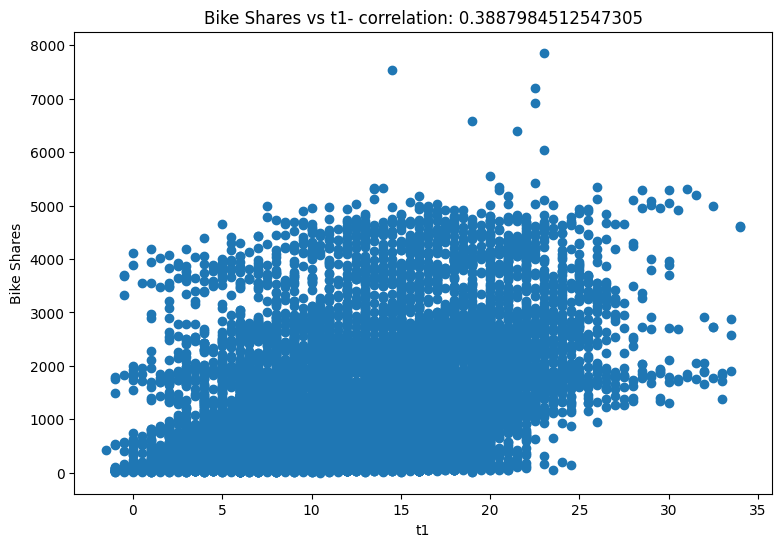

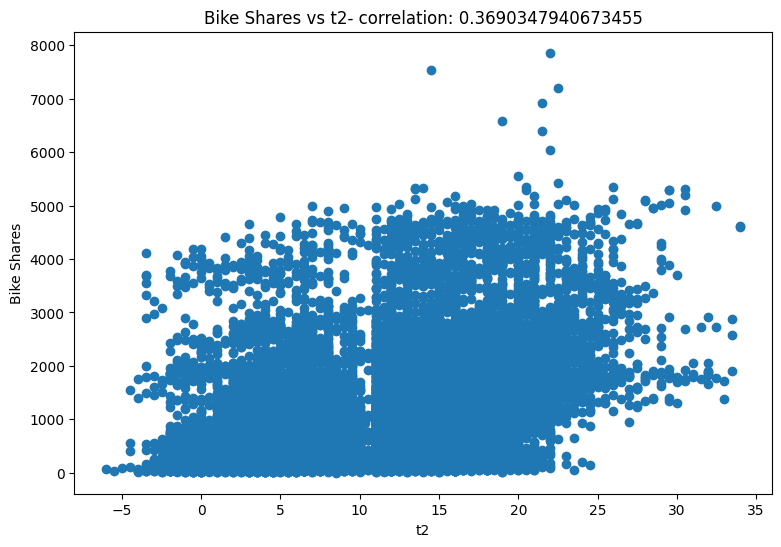

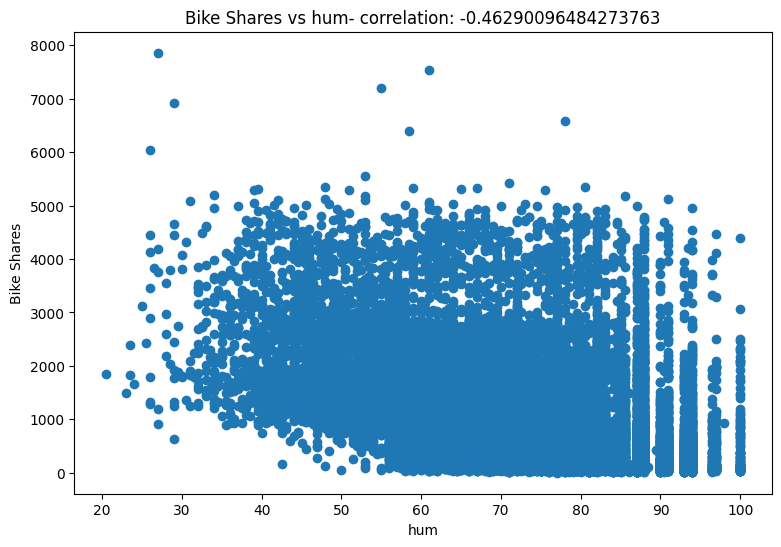

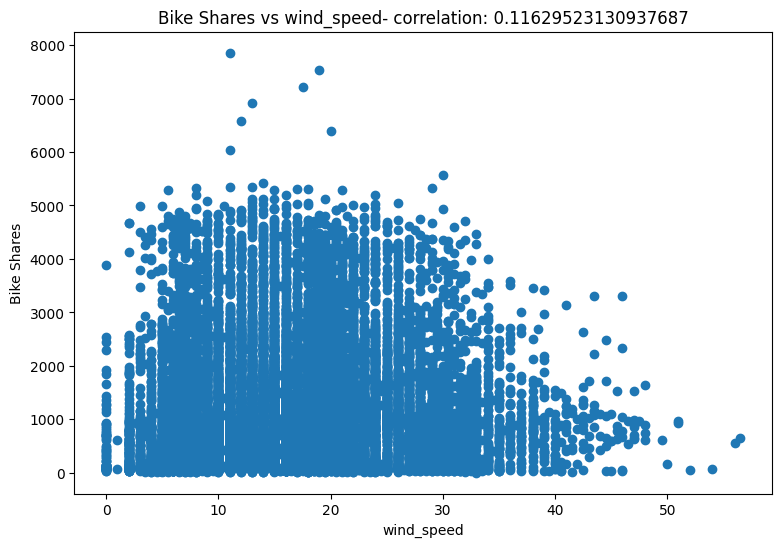

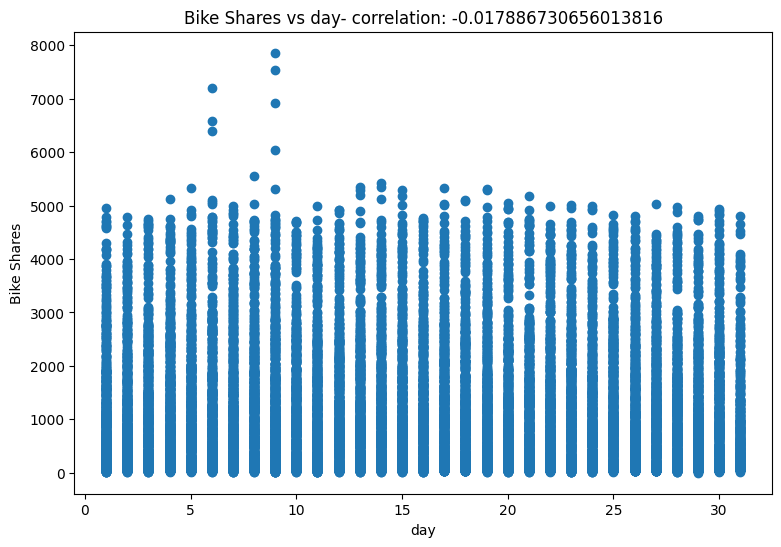

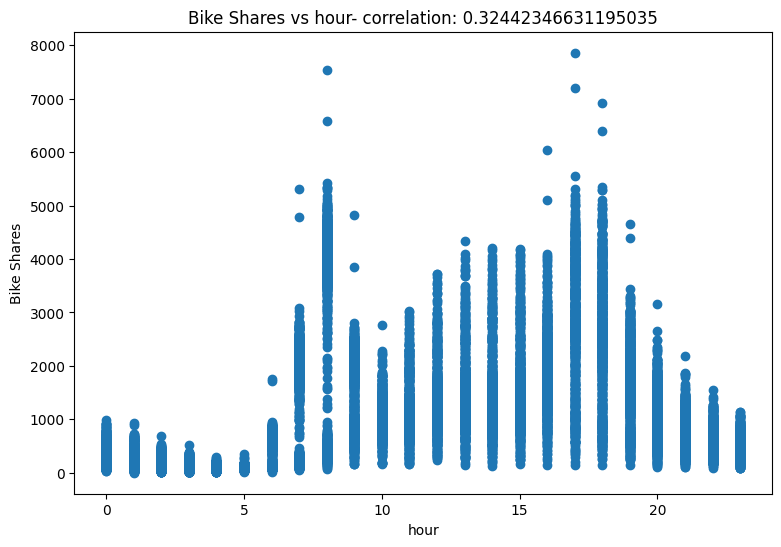

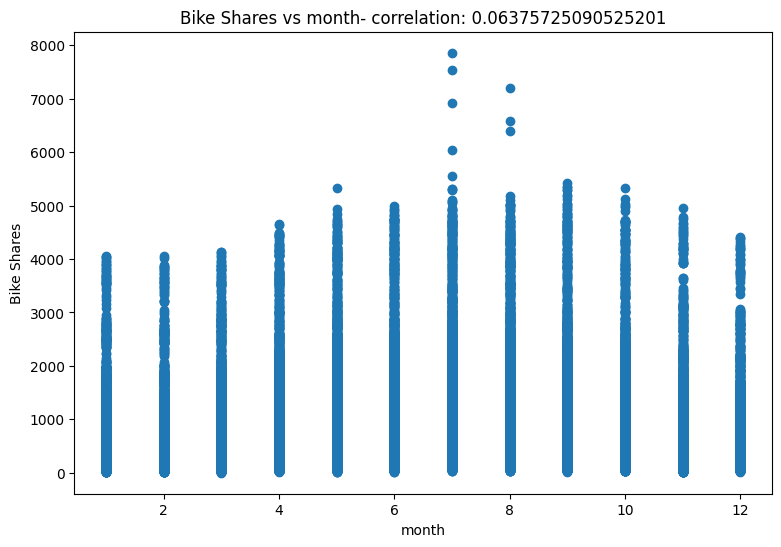

In [9]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Shares')
    ax.set_title('Bike Shares vs ' + col + '- correlation: ' + str(correlation))
plt.show()

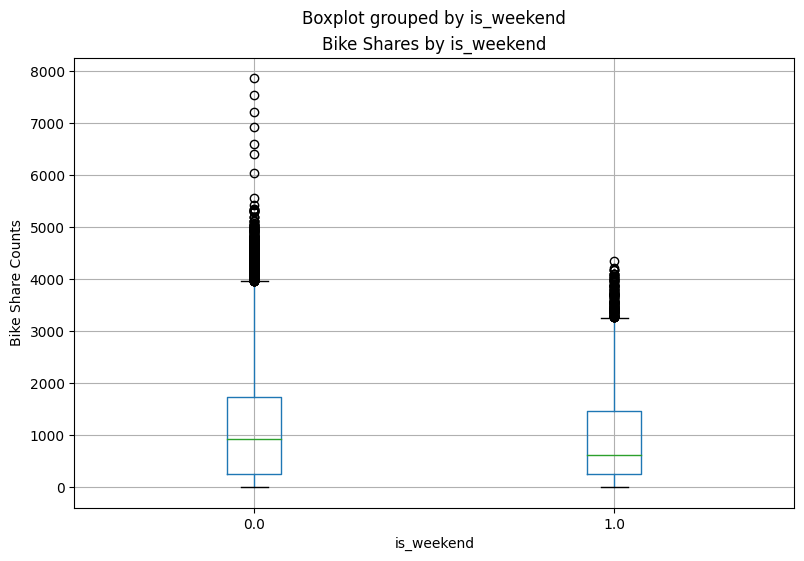

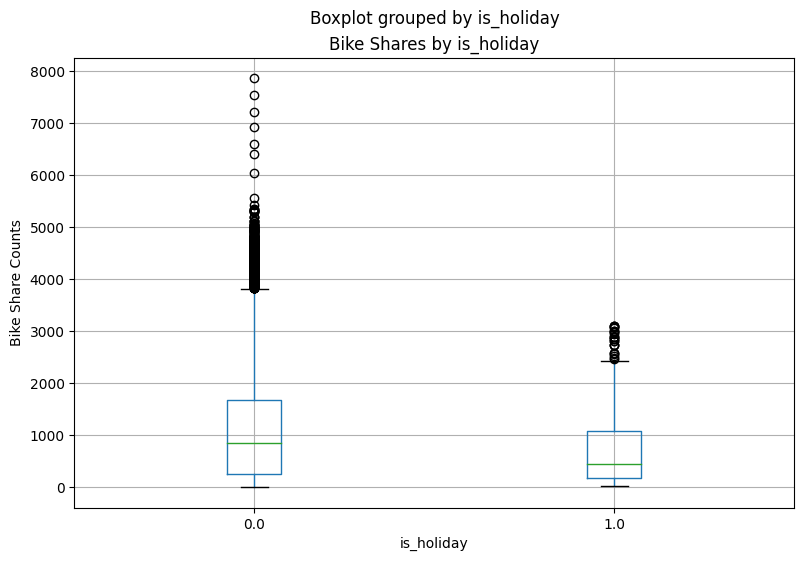

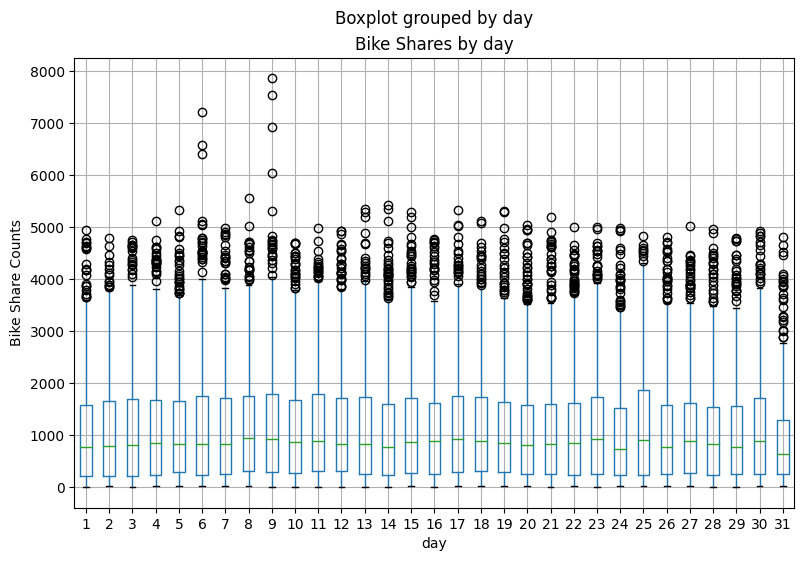

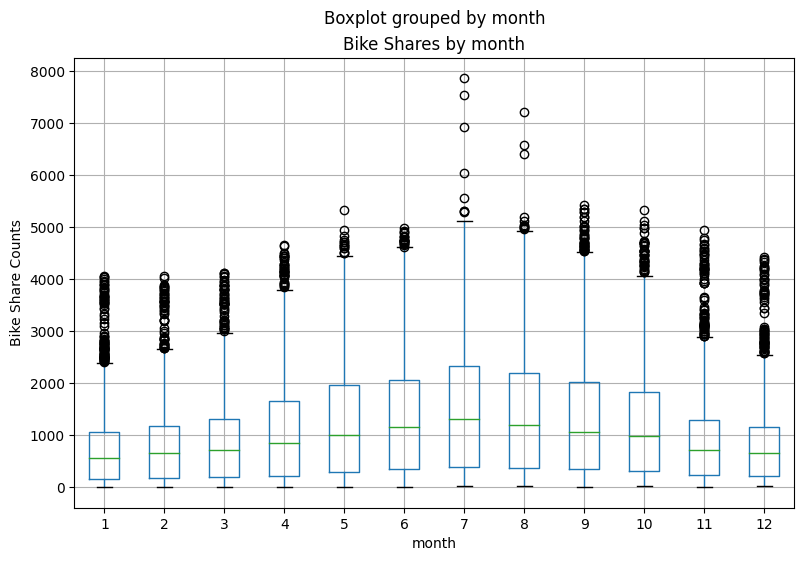

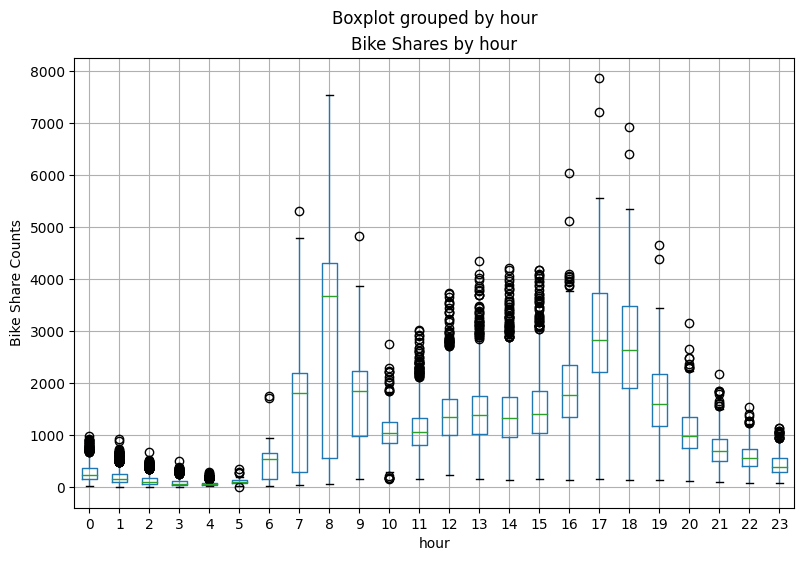

In [10]:
# plot a bar plot for each categorical feature count
categorical_features = ['is_weekend','is_holiday','day','month','hour']
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'cnt', by = col, ax = ax)
    ax.set_title('Bike Shares by ' + col)
    ax.set_ylabel("Bike Share Counts")
plt.show()

In [11]:
# Segregating Features and Target variable as X and y respectively

X = bike_data.drop("cnt", axis=1)
y = bike_data["cnt"]

In [12]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 13931 rows
Test Set: 3483 rows


In [13]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train[['t1', 't2', 'hum', 'wind_speed','month','day', 'hour']] = scaler.fit_transform(X_train[['t1', 't2', 'hum', 'wind_speed','month','day', 'hour']])

X_test[['t1', 't2', 'hum', 'wind_speed','month','day', 'hour']] = scaler.transform(X_test[['t1', 't2', 'hum', 'wind_speed','month','day', 'hour']])

# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)

In [14]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1159. 1841.  963. 2256. 2022. 1827. 1146.  627. 1123. 1132.]
Actual labels   :  6597      705
3181      958
15495     497
13414    1392
7921     3073
2576     2190
12436     138
17381    1350
3479     1845
16493    1705
Name: cnt, dtype: int64


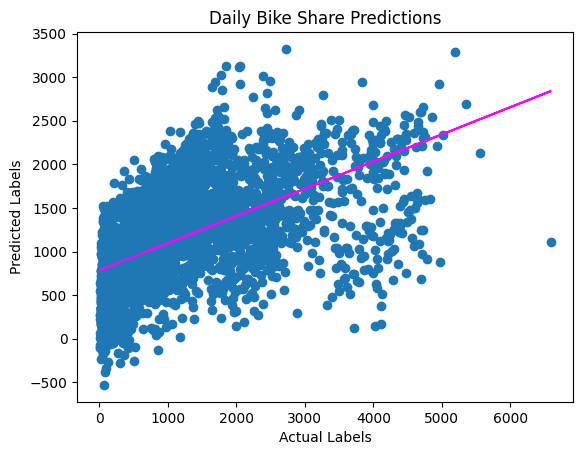

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 814512.2659879726
RMSE: 902.5033329511713
R2: 0.31944661704384913


Lasso() 

MSE: 814938.4409969619
RMSE: 902.7394092410954
R2: 0.31909053297217815


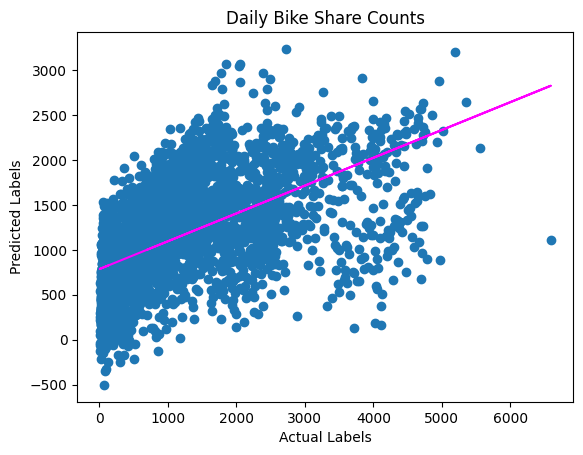

In [17]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Counts')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

MSE: 99076.92276772897
RMSE: 314.76486901769863
R2: 0.9172177783220039


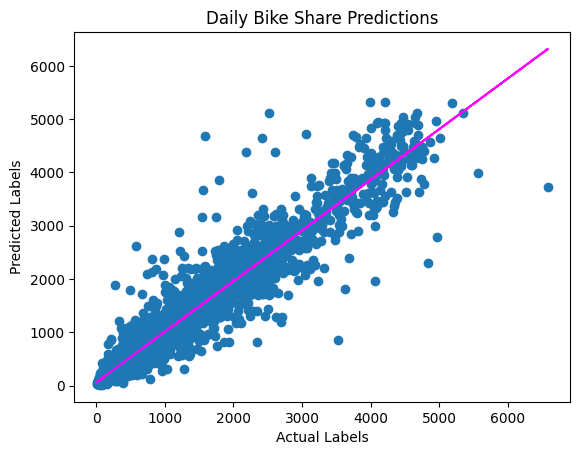

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 55517.246613321855
RMSE: 235.6209808427973
R2: 0.9536134057486803


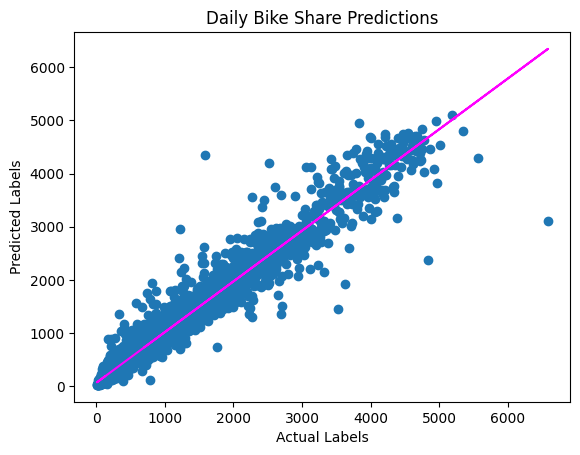

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model_rf = RandomForestRegressor().fit(X_train, y_train)
print (model_rf, "\n")

# Evaluate the model using the test data
predictions = model_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()